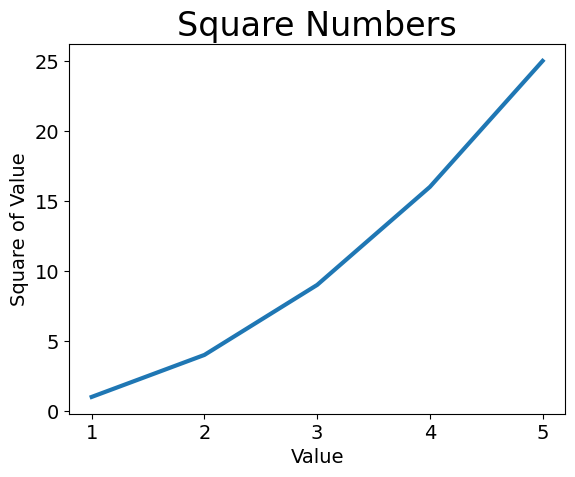

In [1]:
import matplotlib.pyplot as plt
input_values = [1, 2, 3, 4, 5]
squares = [1, 4, 9, 16, 25]
plt.plot(input_values,squares,linewidth=3)
plt.title("Square Numbers",fontsize=24)
plt.xlabel("Value",fontsize=14)
plt.ylabel("Square of Value",fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.show()

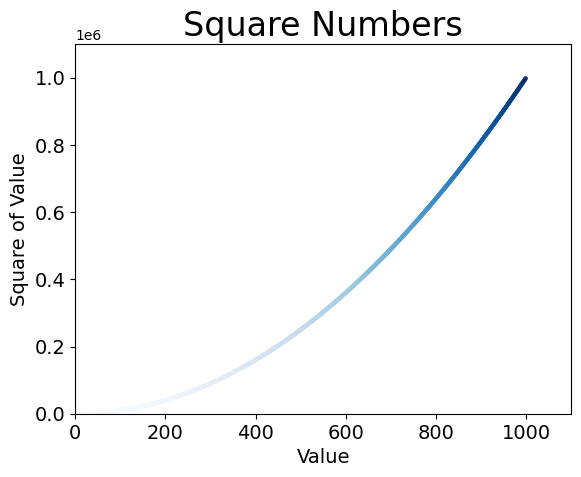

In [2]:
import matplotlib.pyplot as plt

x_values=list(range(1,1000))
y_values=[x**2 for x in x_values]
plt.scatter(x_values,y_values,c=y_values,cmap=plt.cm.Blues,edgecolor='none',s=10)
plt.axis([0,1100,0,1100000])
plt.title("Square Numbers",fontsize=24)
plt.xlabel("Value",fontsize=14)
plt.ylabel("Square of Value",fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.savefig('squares_plot.png', bbox_inches='tight')
plt.show()

In [3]:
from random import choice
class RandomWalk:
    """A class to generate random walks."""
    def __init__(self,num_points=5000):
        self.num_points=num_points
        """Initialize attributes of a walk."""
        self.x_values=[0]
        self.y_values=[0]
        
    def fill_walk(self):
        """Calculate all the points in the walk."""
        while len(self.x_values)<self.num_points:
            x_direction=choice([1,-1])
            x_distance=choice([0,1,2,3,4])
            x_step=x_direction*x_distance
            y_direction=choice([1,-1])
            y_distance=choice([0,1,2,3,4])
            y_step=y_direction*y_distance
            if x_step==0 and y_step==0:
                continue
            next_x=self.x_values[-1]+x_step
            next_y=self.y_values[-1]+y_step
            self.x_values.append(next_x)
            self.y_values.append(next_y)

In [ ]:
while True:
    rw=RandomWalk()
    rw.fill_walk()
    plt.scatter(rw.x_values,rw.y_values,s=15)
    plt.show()
    keep_running=input("Make another walk? (y/n): ")
    if keep_running=='n':
        break

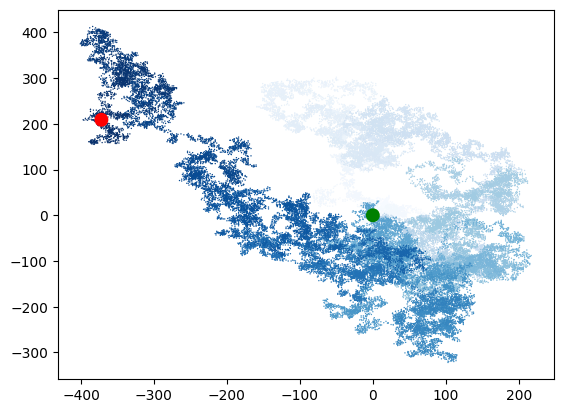

<Figure size 1280x768 with 0 Axes>

In [ ]:

rw=RandomWalk(50000)
rw.fill_walk()
point_numbers=list(range(rw.num_points))
plt.scatter(rw.x_values,rw.y_values,c=point_numbers,cmap=plt.cm.Blues,edgecolor='none',s=1)
plt.scatter(0,0,c='green',edgecolor='none',s=100)
plt.scatter(rw.x_values[-1],rw.y_values[-1],c='red',edgecolor='none',s=100)
plt.figure(dpi=128,figsize=(10,6))
plt.show()

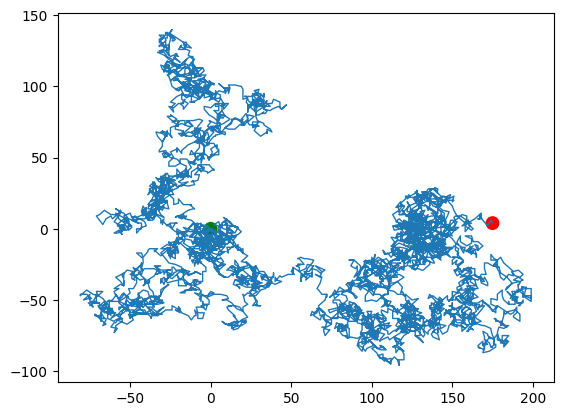

<Figure size 1280x768 with 0 Axes>

In [36]:
rw=RandomWalk()
rw.fill_walk()
point_numbers=list(range(rw.num_points))
plt.plot(rw.x_values,rw.y_values,linewidth=1)
#plt.scatter(rw.x_values,rw.y_values,c=point_numbers,cmap=plt.cm.Blues,edgecolor='none',s=1)
plt.scatter(0,0,c='green',edgecolor='none',s=100)
plt.scatter(rw.x_values[-1],rw.y_values[-1],c='red',edgecolor='none',s=100)
plt.figure(dpi=128,figsize=(10,6))
plt.show()

Rolling dice with pygal


In [2]:
from random import randint
class Die:
    def __init__(self,num_sides=6):
        """Assume a six-sided die."""
        self.num_sides=num_sides
    def roll(self):
        """Return a random value between 1 and the number of sides."""
        return randint(1,self.num_sides)


In [3]:
die=Die()
results=[]
for roll_num in range(100):
    result=die.roll()
    results.append(result)
print(results)

[2, 2, 4, 6, 4, 5, 3, 6, 6, 5, 6, 3, 4, 3, 1, 4, 4, 1, 3, 5, 3, 1, 6, 3, 1, 5, 5, 1, 3, 3, 2, 2, 4, 3, 6, 3, 5, 4, 5, 1, 5, 3, 1, 5, 5, 4, 4, 6, 4, 5, 4, 2, 1, 3, 1, 3, 5, 6, 2, 3, 2, 4, 3, 2, 4, 6, 1, 1, 5, 6, 3, 4, 1, 2, 2, 5, 1, 2, 3, 5, 6, 2, 1, 1, 1, 2, 6, 4, 3, 2, 4, 1, 3, 4, 4, 6, 6, 6, 1, 3]


In [5]:
results=[]
for roll_num in range(1000):
    result=die.roll()
    results.append(result)

frequencies=[]
for value in range(1,die.num_sides+1):
    frequency=results.count(value)
    frequencies.append(frequency)
print(frequencies)

[164, 176, 155, 166, 157, 182]


In [9]:
import pygal

#visualizing the results
hist=pygal.Bar()
hist.title="Results of rolling one D6 1000 times."
hist.x_labels=['1','2','3','4','5','6']
hist.x_title="Result"
hist.y_title="Frequency of Result"
hist.add('D6',frequencies)
hist.render_to_file('die_visual.svg')


In [10]:
die_1=Die()
die_2=Die()
results=[]
for roll_num in range(1000):
    result=die_1.roll()+die_2.roll()
    results.append(result)

frequencies=[]
max_result=die_1.num_sides+die_2.num_sides
for value in range(2,max_result+1):
    frequency=results.count(value)
    frequencies.append(frequency)
#visualizing the results
hist=pygal.Bar()
hist.title="Results of rolling two D6 1000 times."
hist.x_labels=list(range(2,max_result+1))
hist.x_title="Result"
hist.y_title="Frequency of Result"
hist.add('D6+D6',frequencies)
hist.render_to_file('die_visual.svg')

Rolling dices of different sizes


In [11]:
die_1=Die()
die_2=Die(10)
results=[]
for roll_num in range(50000):
    result=die_1.roll()+die_2.roll()
    results.append(result)
frequencies=[]
max_result=die_1.num_sides+die_2.num_sides
for value in range(2,max_result+1):
    frequency=results.count(value)
    frequencies.append(frequency)
#visualizing the results
hist=pygal.Bar()
hist.title="Results of rolling a D6 and a D10 50000 times."
hist.x_labels=list(range(2,max_result+1))
hist.x_title="Result"
hist.y_title="Frequency of Result"
hist.add('D6+D10',frequencies)
hist.render_to_file('die_visual.svg')

In [13]:

# Rolling two dice and multiplying the results instead of adding
die_1 = Die()
die_2 = Die()
results = []
for roll_num in range(10000):
    result = die_1.roll() * die_2.roll()  # Multiply instead of add
    results.append(result)

frequencies = []
max_result = die_1.num_sides * die_2.num_sides  # Maximum possible product
for value in range(1, max_result + 1):
    frequency = results.count(value)
    frequencies.append(frequency)

# Visualizing the results
hist = pygal.Bar()
hist.title = "Results of rolling two D6 and multiplying 10000 times."
hist.x_labels = list(range(1, max_result + 1))
hist.x_title = "Product Result"
hist.y_title = "Frequency of Result"
hist.add('D6 × D6', frequencies)
hist.render_to_file('dice_multiplication_visual.svg')